# Reto 03
***Dr. Antonio Arista Jalife***

En este reto vamos a comparar todos los clasificadores entre si, para ver que tal funcionan. Podemos generar comparativas entre si y ver que tal funcionan. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification 
from sklearn.model_selection import train_test_split

Generamos nuestro dataset...

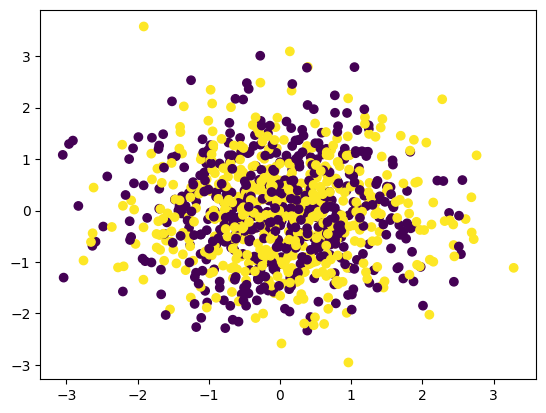

In [2]:
x, y = make_classification(n_samples=1000, n_classes=2, n_features=10)
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

Y generamos nuestras funciones para evaluar

In [3]:
from sklearn.metrics import confusion_matrix

def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy
def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad
def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def evaluar(y_test, y_pred):
    resultado = confusion_matrix(y_test, y_pred)
    print(resultado)
    (TN, FP, FN, TP) = resultado.ravel()
    print("True positives: "+str(TP))
    print("True negatives: "+str(TN))
    print("False positives: "+str(FP))
    print("False negative: "+str(FN))

    acc = calcularAccuracy(TP, TN, FP, FN)
    sen = calcularSensibilidad(TP, TN, FP, FN)
    spec = calcularEspecificidad(TP, TN, FP, FN)
    print("Precision:"+str(acc)+"%")
    print("Sensibilidad:"+str(sen)+"%")
    print("Especificidad:"+str(spec)+"%")

## Naïve Bayes:

In [4]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train) 
y_pred_nb = NaiveBayes.predict(x_test) 

In [5]:
evaluar(y_test, y_pred_nb)

[[173  36]
 [ 26 165]]
True positives: 165
True negatives: 173
False positives: 36
False negative: 26
Precision:84.5%
Sensibilidad:86.38743455497382%
Especificidad:82.77511961722487%


## Support Vector Machine:

In [6]:
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.pipeline import make_pipeline

SupportVectorMachine = SVC()
SupportVectorMachine.fit(x_train, y_train) 
y_pred_svm = SupportVectorMachine.predict(x_test) 

In [7]:
evaluar(y_test, y_pred_svm)

[[178  31]
 [ 30 161]]
True positives: 161
True negatives: 178
False positives: 31
False negative: 30
Precision:84.75%
Sensibilidad:84.29319371727748%
Especificidad:85.16746411483254%


## Redes Neuronales Artificiales: 

In [8]:
from sklearn.neural_network import MLPClassifier
NeuralNetwork = MLPClassifier(hidden_layer_sizes=(10,4),
                            max_iter=20000,
                            activation ='logistic',
                            tol= 1e-8)

NeuralNetwork.fit(x_train, y_train)
y_pred_nn = NeuralNetwork.predict(x_test)

In [9]:
evaluar(y_test, y_pred_nn)

[[178  31]
 [ 25 166]]
True positives: 166
True negatives: 178
False positives: 31
False negative: 25
Precision:86.0%
Sensibilidad:86.91099476439791%
Especificidad:85.16746411483254%


## Random Forests:

In [10]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators = 800)
RandomForest.fit(x_train, y_train)
y_pred_rfc = RandomForest.predict(x_test)

In [11]:
evaluar(y_test, y_pred_rfc)

[[184  25]
 [ 20 171]]
True positives: 171
True negatives: 184
False positives: 25
False negative: 20
Precision:88.75%
Sensibilidad:89.52879581151832%
Especificidad:88.03827751196172%
